In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(12,7)})

In [3]:
clasterisation_regions = pd.read_excel('C:/Users/a.al.kosheleva/analytics/kosheleva_a/files/clasterisation_regions.xlsx') 

In [4]:
import pandas as pd
import os
import datetime
from tqdm.notebook import tqdm as tqdm_notebook
#import mmh3
import seaborn as sns

from sqlalchemy import create_engine

from clickhouse_sqlalchemy import make_session
from urllib.parse import quote

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [5]:
clasterisation_regions.dtypes

city                                 object
avg_check_e_commerce                float64
e_com_share_value_percent           float64
avg_check_lenta_online              float64
brand_share_value_percent           float64
nps_lenta_online                    float64
brand_share_region_yandex_search    float64
affinity_index_lo                   float64
affinity_index_delivery             float64
spontaneous_knowledge               float64
suggested_knowledge                 float64
orders_12_months                    float64
orders_last_month                   float64
top_of_mind                         float64
buyers_lenta_online                   int64
dtype: object

In [6]:
clasterisation_regions.head()

,city,avg_check_e_commerce,e_com_share_value_percent,avg_check_lenta_online,brand_share_value_percent,nps_lenta_online,brand_share_region_yandex_search,affinity_index_lo,affinity_index_delivery,spontaneous_knowledge,suggested_knowledge,orders_12_months,orders_last_month,top_of_mind,buyers_lenta_online
0,Альметьевск,922.75,1.53,1932.32,0.32,62.16,4.0,97.0,49.0,7.0,25.5,0.0,0.0,7.0,3453
1,Армавир,1378.42,0.92,2023.66,0.35,61.11,6.0,357.0,57.0,17.0,51.2,28.4,11.1,10.1,2408
2,Архангельск,1267.77,0.73,2205.76,0.18,58.41,8.0,134.0,211.0,32.8,49.9,6.7,3.5,14.8,5791
3,Астрахань,1366.53,2.36,2237.17,0.23,49.07,4.0,80.0,52.0,25.2,60.2,21.9,9.7,14.1,6439
4,Балаково,1406.01,0.67,1920.83,0.29,49.37,8.0,96.0,76.0,33.7,50.3,32.7,5.0,22.4,2731


C:\Users\a.al.kosheleva\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


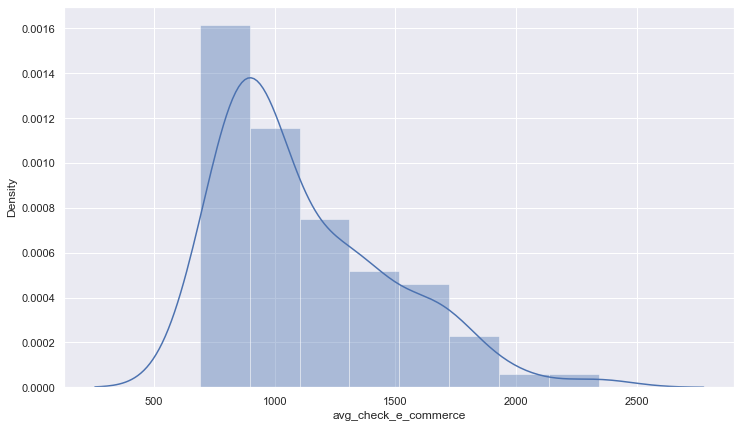

In [7]:
ax = sns.distplot(clasterisation_regions.avg_check_e_commerce)

C:\Users\a.al.kosheleva\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


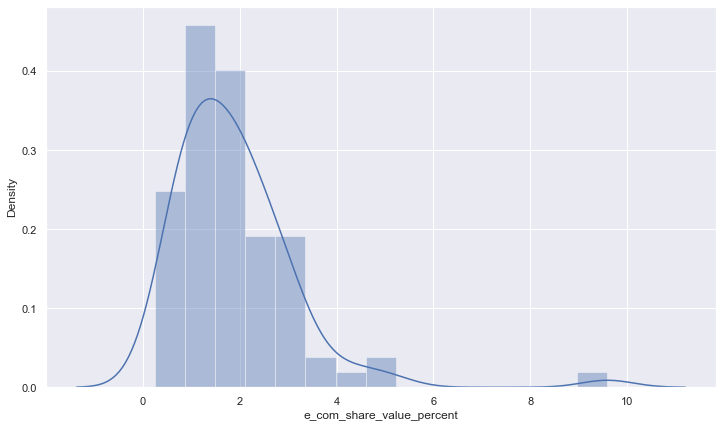

In [8]:
ax = sns.distplot(clasterisation_regions.e_com_share_value_percent)

C:\Users\a.al.kosheleva\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


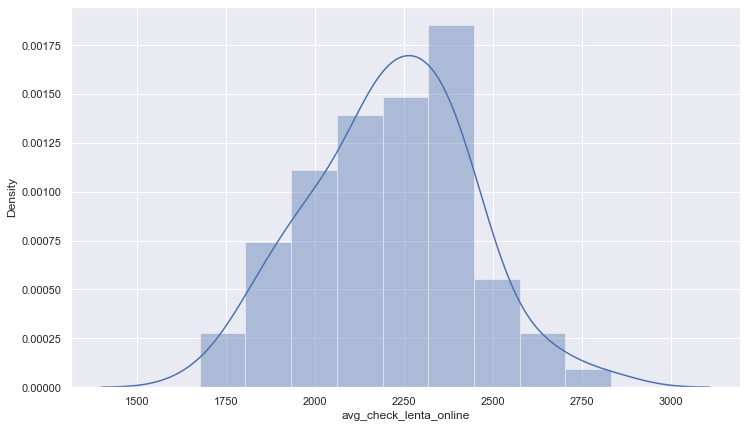

In [9]:
ax = sns.distplot(clasterisation_regions.avg_check_lenta_online)

C:\Users\a.al.kosheleva\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


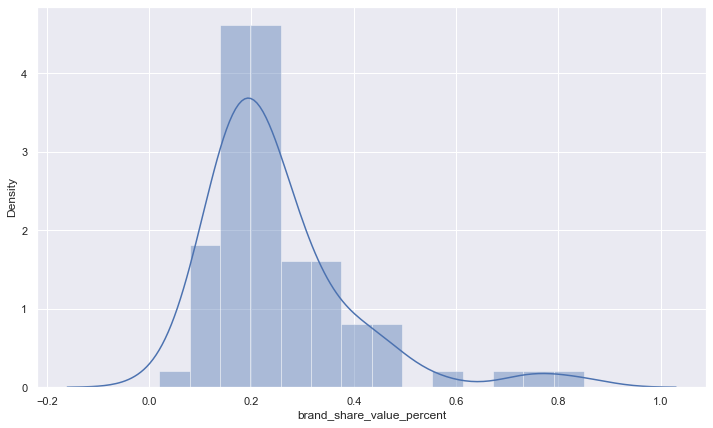

In [10]:
ax = sns.distplot(clasterisation_regions.brand_share_value_percent)

C:\Users\a.al.kosheleva\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


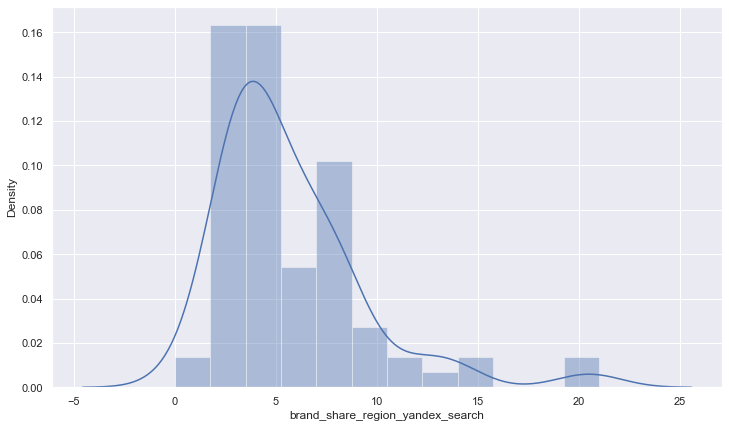

In [11]:
ax = sns.distplot(clasterisation_regions.brand_share_region_yandex_search)

C:\Users\a.al.kosheleva\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


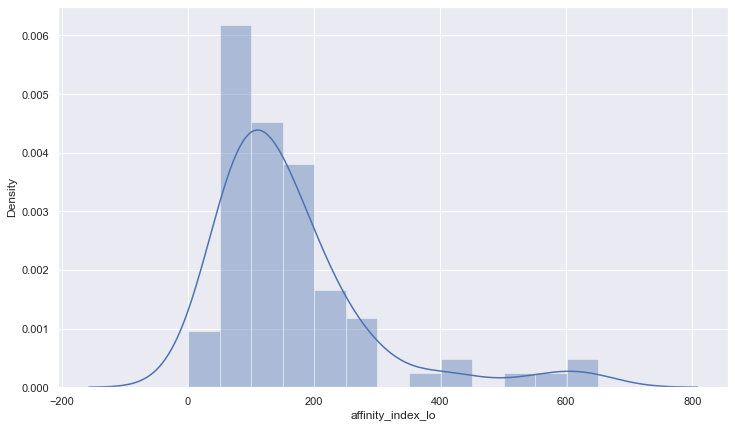

In [12]:
ax = sns.distplot(clasterisation_regions.affinity_index_lo)

C:\Users\a.al.kosheleva\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


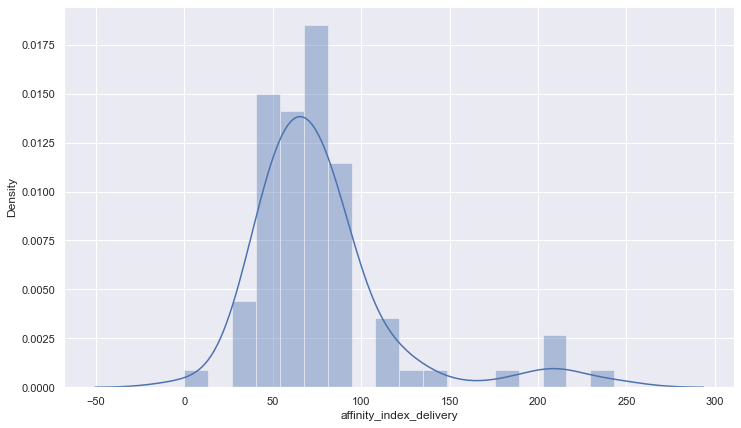

In [13]:
ax = sns.distplot(clasterisation_regions.affinity_index_delivery)

In [14]:
#у части данных есть хвосты, так что лучше все прологарифмировать

In [15]:
column_headers = list(clasterisation_regions.columns.values)

In [16]:
column_headers

['city',
 'avg_check_e_commerce',
 'e_com_share_value_percent',
 'avg_check_lenta_online',
 'brand_share_value_percent',
 'nps_lenta_online',
 'brand_share_region_yandex_search',
 'affinity_index_lo',
 'affinity_index_delivery',
 'spontaneous_knowledge',
 'suggested_knowledge',
 'orders_12_months',
 'orders_last_month',
 'top_of_mind',
 'buyers_lenta_online']

In [17]:
# преобразуем датафрэйм для кластеризации (убираем тяжелые хвосты в метриках)
def get_log_df(data):
    def log_transform(v): 
        res = np.log(v+1)
        return res
    
    data_tmp = data.copy()
    for el in ['avg_check_e_commerce',
 'e_com_share_value_percent',
 'avg_check_lenta_online',
 'brand_share_value_percent',
 'nps_lenta_online',
 'brand_share_region_yandex_search',
 'affinity_index_lo',
 'affinity_index_delivery',
 'suggested_knowledge',
 'orders_last_month',
 'top_of_mind']:
        data_tmp[el] = data_tmp[el].apply(lambda x: log_transform(x))
    return data_tmp[['avg_check_e_commerce',
 'e_com_share_value_percent',
 'avg_check_lenta_online',
 'brand_share_value_percent',
 'nps_lenta_online',
 'brand_share_region_yandex_search',
 'affinity_index_lo',
 'affinity_index_delivery',
 'suggested_knowledge',
 'orders_last_month',
 'top_of_mind']]

In [18]:
df_log = get_log_df(clasterisation_regions.copy())

In [19]:
df_log

,avg_check_e_commerce,e_com_share_value_percent,avg_check_lenta_online,brand_share_value_percent,nps_lenta_online,brand_share_region_yandex_search,affinity_index_lo,affinity_index_delivery,suggested_knowledge,orders_last_month,top_of_mind
0,6.828441,0.928219,7.566994,0.277632,4.145671,1.609438,4.584967,3.912023,3.277145,0.000000,2.079442
1,7.229418,0.652325,7.613157,0.300105,4.128907,1.945910,5.880533,4.060443,3.955082,2.493205,2.406945
2,7.145803,0.548121,7.699281,0.165514,4.084463,2.197225,4.905275,5.356586,3.929863,1.504077,2.760010
3,7.220761,1.211941,7.713414,0.207014,3.913422,1.609438,4.394449,3.970292,4.114147,2.370244,2.714695
4,7.249222,0.512824,7.561033,0.254642,3.919396,2.197225,4.574711,4.343805,3.937691,1.791759,3.152736
...,...,...,...,...,...,...,...,...,...,...,...
79,6.795527,1.118415,7.684329,0.148420,3.985088,1.386294,5.099866,4.077537,3.848018,1.280934,1.840550
80,7.015317,0.506818,7.737045,0.190620,4.110874,2.302585,5.327876,4.060443,4.343805,1.308333,2.610070
81,7.384883,0.765468,7.678127,0.398776,4.339641,2.079442,4.276666,3.951244,4.519612,2.850707,3.339322
82,7.036518,0.667829,7.666568,0.207014,4.214643,2.079442,4.290459,3.761200,0.000000,0.000000,0.000000


In [20]:
from sklearn.preprocessing import MinMaxScaler

### МинМакс скалирование

In [21]:
#нормализуем данные, приведем к одной шкале
df_log_sc = MinMaxScaler().fit_transform(df_log)

In [22]:
df_log_sc.shape

(84, 11)

In [23]:
df_log_sc_clmns = pd.DataFrame(df_log_sc)

In [24]:
df_log_sc_clmns.columns = df_log.columns

In [25]:
from scipy.cluster.hierarchy import fcluster, linkage
from sklearn.manifold import TSNE

### Сохраняем tSNE отображение

In [26]:
tsne_representation = TSNE(n_components=2, random_state=321).fit_transform(df_log_sc)

In [27]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [28]:
distance_matrix = linkage(tsne_representation, method = 'ward', metric = 'euclidean')

In [29]:
from scipy.cluster.hierarchy import dendrogram

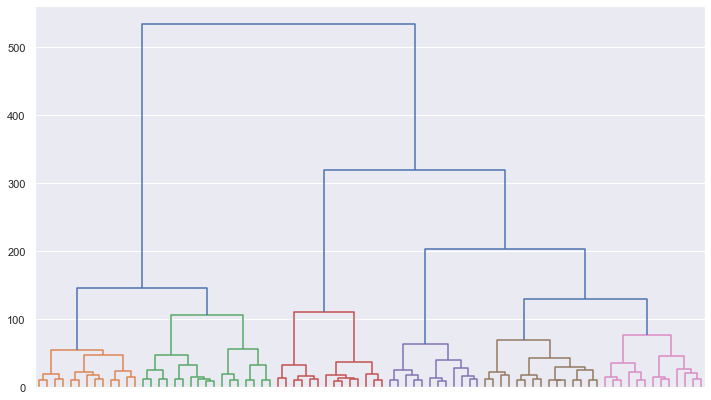

In [30]:
dn = dendrogram(
        distance_matrix,
        leaf_rotation=90.,
        leaf_font_size=8.,
        truncate_mode='level',
        p=16,
        color_threshold=120,
        no_labels=True
    )

In [32]:
#итого было выбрано взять 6 кластеров, далее будет график и подсчет средних значений
cl_tsne_labels_final = pd.Series(fcluster(distance_matrix, 5, criterion='maxclust'))

In [33]:
cl_tsne_labels_final_agg = cl_tsne_labels_final

In [34]:
clusters_df = pd.DataFrame({
    'cl_tsne_labels_final':cl_tsne_labels_final,
    'cl_tsne_labels_final_agg':cl_tsne_labels_final,
    'x':tsne_representation[:,0],
    'y':tsne_representation[:,1]
}
)

In [35]:
import matplotlib.cm as cm
def get_clusters_image(l):
    clusters_df = pd.DataFrame({
        'cl_tsne_labels_final_agg':l,
        'x':tsne_representation[:,0],
        'y':tsne_representation[:,1]
    }
    )
    colors = cm.rainbow(np.linspace(0,1,len(set(l))))
    for y, c in zip(set(l), colors):
        plt.scatter(tsne_representation[pd.Series(l).values==y, 0], 
                    tsne_representation[pd.Series(l).values==y, 1], c=c, alpha=0.3, label=str(y))
    return plt.legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

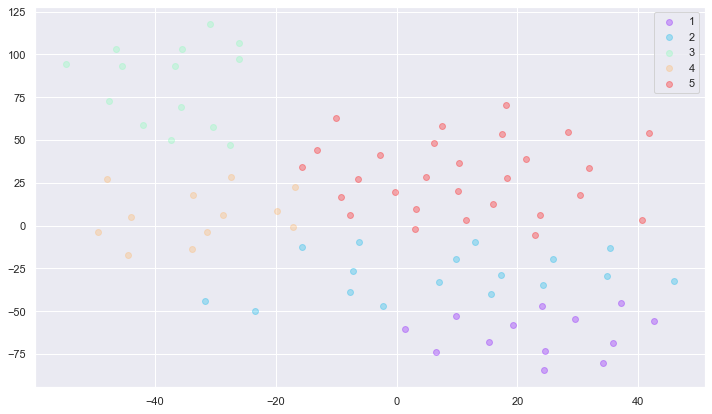

In [36]:
get_clusters_image(cl_tsne_labels_final_agg)

In [37]:
clasterisation_regions["labels_4"] = cl_tsne_labels_final_agg

In [38]:
clasterisation_regions.head()

,city,avg_check_e_commerce,e_com_share_value_percent,avg_check_lenta_online,brand_share_value_percent,nps_lenta_online,brand_share_region_yandex_search,affinity_index_lo,affinity_index_delivery,spontaneous_knowledge,suggested_knowledge,orders_12_months,orders_last_month,top_of_mind,buyers_lenta_online,labels_4
0,Альметьевск,922.75,1.53,1932.32,0.32,62.16,4.0,97.0,49.0,7.0,25.5,0.0,0.0,7.0,3453,3
1,Армавир,1378.42,0.92,2023.66,0.35,61.11,6.0,357.0,57.0,17.0,51.2,28.4,11.1,10.1,2408,1
2,Архангельск,1267.77,0.73,2205.76,0.18,58.41,8.0,134.0,211.0,32.8,49.9,6.7,3.5,14.8,5791,2
3,Астрахань,1366.53,2.36,2237.17,0.23,49.07,4.0,80.0,52.0,25.2,60.2,21.9,9.7,14.1,6439,2
4,Балаково,1406.01,0.67,1920.83,0.29,49.37,8.0,96.0,76.0,33.7,50.3,32.7,5.0,22.4,2731,1


In [43]:
clasterisation_regions["labels_4"] = np.where(clasterisation_regions["city"] == "Москва", 6, clasterisation_regions["labels_4"])
clasterisation_regions["labels_4"] = np.where(clasterisation_regions["city"] == "Санкт-Петербург", 7, clasterisation_regions["labels_4"])

In [44]:
df_vis = clasterisation_regions[['avg_check_e_commerce',
 'e_com_share_value_percent',
 'avg_check_lenta_online',
 'brand_share_value_percent',
 'nps_lenta_online',
 'brand_share_region_yandex_search',
 'affinity_index_lo',
 'affinity_index_delivery',
 'suggested_knowledge',
 'orders_last_month',
 'top_of_mind',
'labels_4']].copy()

In [45]:
df_vis

,avg_check_e_commerce,e_com_share_value_percent,avg_check_lenta_online,brand_share_value_percent,nps_lenta_online,brand_share_region_yandex_search,affinity_index_lo,affinity_index_delivery,suggested_knowledge,orders_last_month,top_of_mind,labels_4
0,922.75,1.53,1932.32,0.32,62.16,4.0,97.0,49.0,25.5,0.0,7.0,3
1,1378.42,0.92,2023.66,0.35,61.11,6.0,357.0,57.0,51.2,11.1,10.1,1
2,1267.77,0.73,2205.76,0.18,58.41,8.0,134.0,211.0,49.9,3.5,14.8,2
3,1366.53,2.36,2237.17,0.23,49.07,4.0,80.0,52.0,60.2,9.7,14.1,2
4,1406.01,0.67,1920.83,0.29,49.37,8.0,96.0,76.0,50.3,5.0,22.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
79,892.84,2.06,2173.01,0.16,52.79,3.0,163.0,58.0,45.9,2.6,5.3,5
80,1112.56,0.66,2290.69,0.21,60.00,9.0,205.0,57.0,76.0,2.7,12.6,2
81,1610.44,1.15,2159.57,0.49,75.68,7.0,71.0,51.0,90.8,16.3,27.2,1
82,1136.42,0.95,2134.74,0.23,66.67,7.0,72.0,42.0,0.0,0.0,0.0,3


In [46]:
df_vis.pivot_table(index='labels_4', aggfunc='mean').transpose().reset_index()

labels_4,index,1,2,3,4,5,6,7
0,affinity_index_delivery,73.692308,85.147059,54.500000,59.083333,85.115385,206.00,213.00
1,affinity_index_lo,183.076923,164.705882,232.142857,176.333333,106.307692,114.00,280.00
2,avg_check_e_commerce,1437.113846,1225.361176,1439.314286,805.234167,881.056154,1130.85,971.23
3,avg_check_lenta_online,2162.298462,2319.485882,2220.720714,1933.420833,2270.843846,2413.27,2617.75
4,brand_share_region_yandex_search,7.846154,6.147059,9.214286,4.416667,3.076923,2.00,6.00
5,brand_share_value_percent,0.322308,0.245294,0.380000,0.195000,0.171538,0.15,0.44
6,e_com_share_value_percent,0.896154,1.535882,1.200714,1.692500,2.683846,9.59,5.15
7,nps_lenta_online,56.900000,48.817941,52.330714,50.350833,46.303077,35.92,42.15
8,orders_last_month,12.823077,4.882353,0.078571,7.091667,4.607692,6.10,6.80
9,suggested_knowledge,69.630769,59.011765,20.542857,60.375000,51.815385,42.30,52.80


In [47]:
clasterisation_regions.groupby('labels_4')['city'].nunique()

labels_4
1    13
2    17
3    14
4    12
5    26
6     1
7     1
Name: city, dtype: int64

In [48]:
df_vis.head(2)

,avg_check_e_commerce,e_com_share_value_percent,avg_check_lenta_online,brand_share_value_percent,nps_lenta_online,brand_share_region_yandex_search,affinity_index_lo,affinity_index_delivery,suggested_knowledge,orders_last_month,top_of_mind,labels_4
0,922.75,1.53,1932.32,0.32,62.16,4.0,97.0,49.0,25.5,0.0,7.0,3
1,1378.42,0.92,2023.66,0.35,61.11,6.0,357.0,57.0,51.2,11.1,10.1,1


In [49]:
df_vis.columns

Index(['avg_check_e_commerce', 'e_com_share_value_percent',
       'avg_check_lenta_online', 'brand_share_value_percent',
       'nps_lenta_online', 'brand_share_region_yandex_search',
       'affinity_index_lo', 'affinity_index_delivery', 'suggested_knowledge',
       'orders_last_month', 'top_of_mind', 'labels_4'],
      dtype='object')

In [65]:
dict_measures = {
    1:['avg_check_e_commerce', 'Средний чек с НДС в E-commerce в целом, руб.'],
    2:['e_com_share_value_percent', 'Доля Ecom в покупках клиентов в денежном выражении, %'],
    3:['avg_check_lenta_online', 'Средний чек с НДС в ЛО, руб.'],
    4:['brand_share_value_percent', 'Доля бренда в покупках клиентов в денежном выражении, %'],
    5:['csi_lenta_online', 'CSI в ЛО'],
    6:['nps_lenta_online', 'NPS в ЛО'],
    7:['affinity_index_lo', 'Аффинити индекс ЛО по отношению к доставке в целом'],
    8:['affinity_index_delivery', 'Аффинити индекс доставки в регионе'],
    9:['labels', 'Кластеры']
}

Средний чек с НДС в E-commerce в целом, руб.


<AxesSubplot:xlabel='labels_4', ylabel='avg_check_e_commerce'>

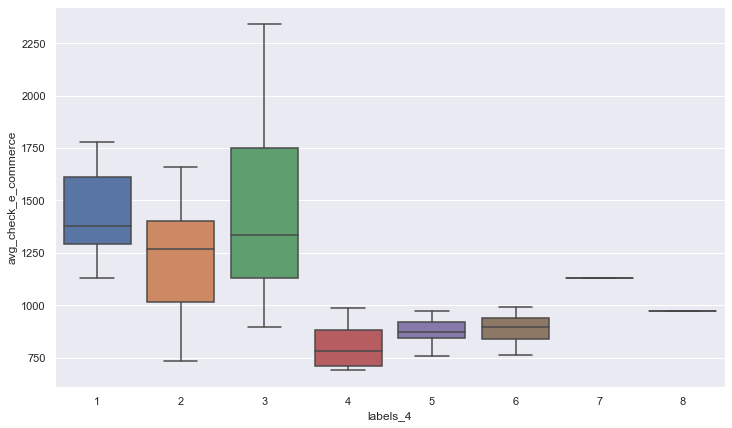

In [66]:
measures = 1
print(dict_measures[measures][1])
sns.boxplot(x="labels_4", y=dict_measures[measures][0], data=df_vis, showfliers = False)

Доля Ecom в покупках клиентов в денежном выражении, %


<AxesSubplot:xlabel='labels_4', ylabel='e_com_share_value_percent'>

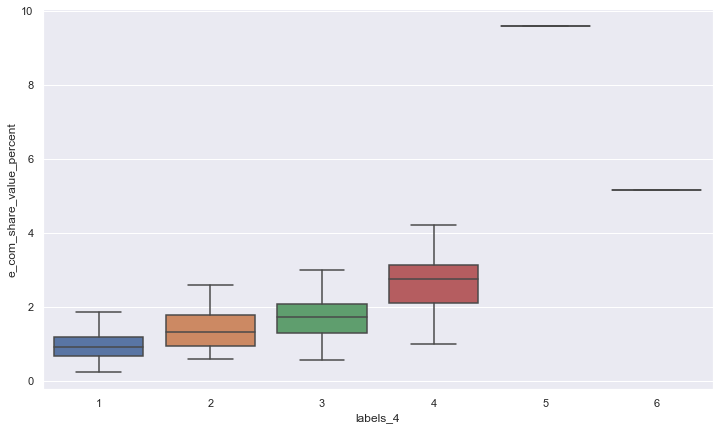

In [53]:
measures = 2
print(dict_measures[measures][1])
sns.boxplot(x="labels_4", y=dict_measures[measures][0], data=df_vis, showfliers = False)

Средний чек с НДС в ЛО, руб.


<AxesSubplot:xlabel='labels_4', ylabel='avg_check_lenta_online'>

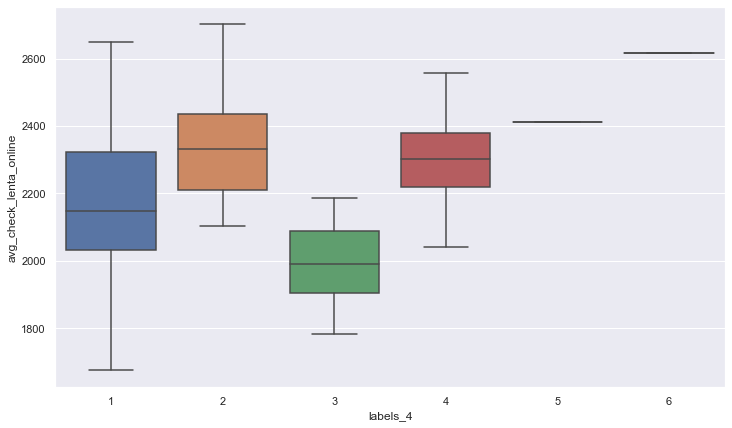

In [58]:
measures = 3
print(dict_measures[measures][1])
sns.boxplot(x="labels_4", y=dict_measures[measures][0], data=df_vis, showfliers = False)

Доля бренда в покупках клиентов в денежном выражении, %


<AxesSubplot:xlabel='labels_4', ylabel='brand_share_value_percent'>

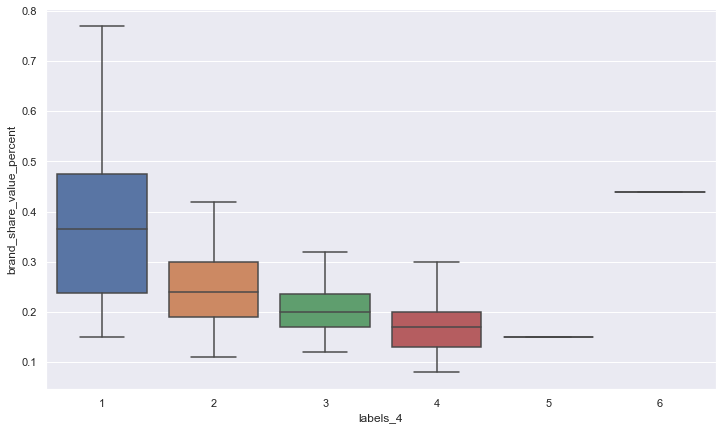

In [59]:
measures = 4
print(dict_measures[measures][1])
sns.boxplot(x="labels_4", y=dict_measures[measures][0], data=df_vis, showfliers = False)

CSI в ЛО


<AxesSubplot:xlabel='labels_4', ylabel='csi_lenta_online'>

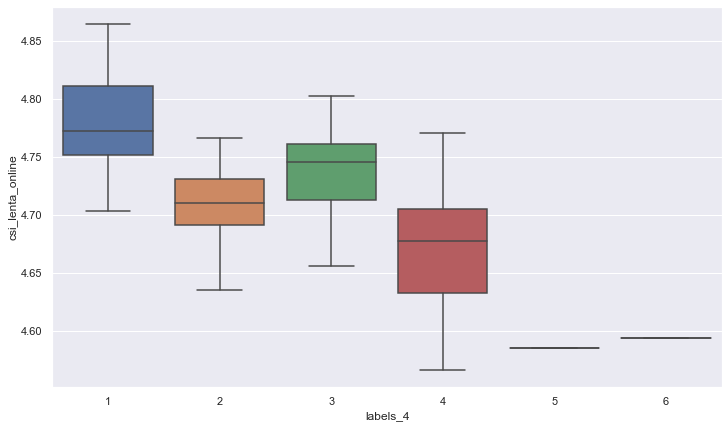

In [57]:
measures = 5
print(dict_measures[measures][1])
sns.boxplot(x="labels_4", y=dict_measures[measures][0], data=df_vis, showfliers = False)

NPS в ЛО


<AxesSubplot:xlabel='labels_4', ylabel='nps_lenta_online'>

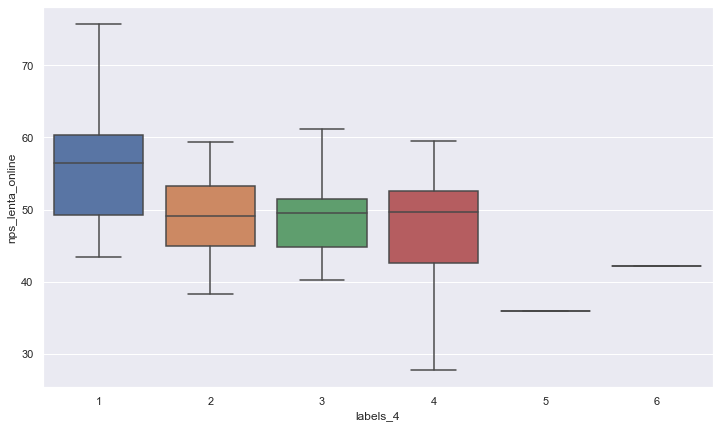

In [60]:
measures = 6
print(dict_measures[measures][1])
sns.boxplot(x="labels_4", y=dict_measures[measures][0], data=df_vis, showfliers = False)

Аффинити индекс ЛО по отношению к доставке в целом


<AxesSubplot:xlabel='labels_4', ylabel='affinity_index_lo'>

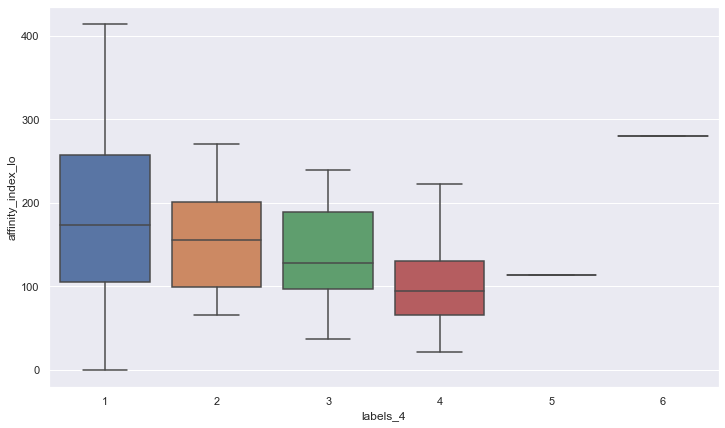

In [61]:
measures = 7
print(dict_measures[measures][1])
sns.boxplot(x="labels_4", y=dict_measures[measures][0], data=df_vis, showfliers = False)

Аффинити индекс доставки в регионе


<AxesSubplot:xlabel='labels_4', ylabel='affinity_index_delivery'>

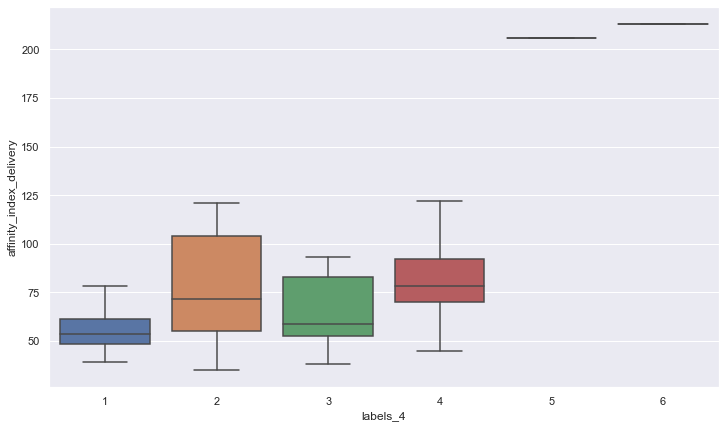

In [62]:
measures = 8
print(dict_measures[measures][1])
sns.boxplot(x="labels_4", y=dict_measures[measures][0], data=df_vis, showfliers = False)

In [51]:
clasterisation_regions.to_excel('clasterisation_regions_with_clusters.xlsx')

In [50]:
df_vis.pivot_table(index='labels_4', aggfunc='mean').transpose().reset_index().to_excel('clasterisation_result.xlsx')

In [177]:
clasterisation_regions.groupby('labels_4')['buyers_lenta_online'].sum()

labels_4
1     51170
2    153031
3     47825
4     94630
5    222973
6     89325
7    135219
8    180926
Name: buyers_lenta_online, dtype: int64